## Marketing Strategy Analysis
#### Programming Script and Technical Report

### Table of Content
1. Introduction
2. Data Loading and Quality 
3. Feature Additions and Engineering
4. Exploratory Data Analysis and Statistical Analysis
5. Final Recommendations (Optimal Sales)
6. Return on Investment (ROI)

### 1. Introduction

**Introduction**

Welcome to the "Marketing Campaign Analytics" Python project, where our goal is to optimize marketing campaigns and create a data-driven marketing strategy using Python. This project utilizes machine learning models, specifically linear regression and correlation analysis, to identify the most effective marketing tactics that significantly impact sales. The ultimate objective is to generate an ROI table that can be presented to management for informed decision-making.

**Background of the Dataset**

We are working with data from three types of hospital accounts: big, medium, and small hospitals. The sales are categorized into organic sales and inorganic revenue generated through marketing strategies such as phone calls, emails, flyers, and sales visits.

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from io import StringIO
from IPython.display import FileLink

## 2. Data Loading and Quality Checks

In [3]:
# Load the dataset
data = pd.read_csv('Campaign-Data.csv')

In [4]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition
0,ID-987275,Medium Facility,2800,125,1003,16-01-2014,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
1,ID-987275,Medium Facility,2800,125,1003,16-02-2014,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low
2,ID-987275,Medium Facility,2800,125,1003,18-03-2014,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
3,ID-987275,Medium Facility,2800,125,1003,18-04-2014,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low
4,ID-987275,Medium Facility,2800,125,1003,19-05-2014,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low


In [5]:
# Display general information about the dataset
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client ID              2976 non-null   object 
 1   Client Type            2976 non-null   object 
 2   Number of Customers    2976 non-null   int64  
 3   Montly Target          2976 non-null   int64  
 4   Zip Code               2976 non-null   int64  
 5   Calendardate           2976 non-null   object 
 6   Amount Collected       2976 non-null   int64  
 7   Unit Sold              2976 non-null   int64  
 8   Campaign (Email)       2976 non-null   float64
 9   Campaign (Flyer)       2976 non-null   float64
 10  Campaign (Phone)       2976 non-null   float64
 11  Sales Contact 1        2976 non-null   float64
 12  Sales Contact 2        2976 non-null   float64
 13  Sales Contact 3        2976 non-null   float64
 14  Sales Contact 4        2976 non-nu

In [6]:
# Displaying column names
print(data.columns)

Index(['Client ID', 'Client Type', 'Number of Customers', 'Montly Target',
       'Zip Code', 'Calendardate', 'Amount Collected', 'Unit Sold',
       'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5', 'Number of Competition'],
      dtype='object')


In [7]:
# Display the shape of the dataset (number of rows and columns)
print("\nDataset Shape:")
print(data.shape)


Dataset Shape:
(2976, 17)


In [8]:
# Display basic statistics of numerical columns
print("\nDescriptive Statistics:")
data.describe()


Descriptive Statistics:


,Number of Customers,Montly Target,Zip Code,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5
count,2976.000000,2976.000000,2976.0,2.976000e+03,2976.000000,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03
mean,1456.935484,75.080645,1003.0,1.700440e+07,121.464718,1.432850e+05,6.854186e+05,2.977743e+04,1.313407e+05,2.023319e+06,1.867487e+06,7.076361e+04,1.462954e+04
std,1669.848734,87.042114,0.0,3.025803e+07,216.413984,7.230452e+05,1.727587e+06,3.832134e+05,1.034882e+06,3.396991e+06,3.271349e+06,3.869872e+05,8.905955e+04
min,0.000000,5.000000,1003.0,-2.216150e+07,-63.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,240.000000,10.000000,1003.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,960.000000,47.500000,1003.0,3.409460e+06,24.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.450000e+05,3.225000e+05,0.000000e+00,0.000000e+00
75%,2090.000000,101.250000,1003.0,2.045676e+07,147.000000,0.000000e+00,8.148285e+04,0.000000e+00,0.000000e+00,2.580000e+06,2.580000e+06,0.000000e+00,0.000000e+00
max,9840.000000,510.000000,1003.0,2.079771e+08,1500.000000,1.144673e+07,1.359395e+07,9.617380e+06,2.902500e+07,3.063750e+07,2.612250e+07,4.837500e+06,1.612500e+06


In [9]:
# Display missing values in the dataset
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Client ID                0
Client Type              0
Number of Customers      0
Montly Target            0
Zip Code                 0
Calendardate             0
Amount Collected         0
Unit Sold                0
Campaign (Email)         0
Campaign (Flyer)         0
Campaign (Phone)         0
Sales Contact 1          0
Sales Contact 2          0
Sales Contact 3          0
Sales Contact 4          0
Sales Contact 5          0
Number of Competition    0
dtype: int64


In [10]:
# Display unique values for specific categorical columns
categorical_columns = ['Client Type', 'Number of Competition']
print("\nUnique Values in Selected Columns:")
for col in categorical_columns:
    if col in data.columns:
        print(f"{col}: {data[col].unique()}")


Unique Values in Selected Columns:
Client Type: ['Medium Facility' 'Large Facility ' 'Small Facility ' 'Private Facility']
Number of Competition: ['Low' 'High']


## 3. Feature Additions and Engineering

In this project, "Amount Collected" serves as the target variable, while the independent variables consist of "Campaign (Email)," "Campaign (Flyer)," "Campaign (Phone)," "Sales Contact 1," "Sales Contact 2," "Sales Contact 3," "Sales Contact 4," and "Sales Contact 5."

In [11]:
## Creation of Additional Features 
# Convert 'Calendardate' to datetime with dayfirst=True
data['Calendardate'] = pd.to_datetime(data['Calendardate'], dayfirst=True)

# Create additional features for month and year
data['Calendar_Month'] = data['Calendardate'].dt.month
data['Calendar_Year'] = data['Calendardate'].dt.year

In [12]:
# Label encoding for 'Client Type' and 'Number of Competition'
label_encoder = LabelEncoder()
data['Client Type'] = label_encoder.fit_transform(data['Client Type'])
data['Number of Competition'] = label_encoder.fit_transform(data['Number of Competition'])

In [13]:
# Drop unnecessary columns
drop_columns = ['Client ID', 'Zip Code', 'Calendardate']
data.drop(columns=drop_columns, inplace=True, errors='ignore')

In [14]:
data.shape

(2976, 16)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client Type            2976 non-null   int32  
 1   Number of Customers    2976 non-null   int64  
 2   Montly Target          2976 non-null   int64  
 3   Amount Collected       2976 non-null   int64  
 4   Unit Sold              2976 non-null   int64  
 5   Campaign (Email)       2976 non-null   float64
 6   Campaign (Flyer)       2976 non-null   float64
 7   Campaign (Phone)       2976 non-null   float64
 8   Sales Contact 1        2976 non-null   float64
 9   Sales Contact 2        2976 non-null   float64
 10  Sales Contact 3        2976 non-null   float64
 11  Sales Contact 4        2976 non-null   float64
 12  Sales Contact 5        2976 non-null   float64
 13  Number of Competition  2976 non-null   int32  
 14  Calendar_Month         2976 non-null   int32  
 15  Cale

## 4. Exploratory Data Analysis and Statistical Analysis


<b> 4.1 Exploring and Understanding basics data </b>

1. Distribution of Data across different accounts
2. Difference of Sales in Account Types (Using Categorical Mean)

<b> 4.2 Statistical Analysis - Answering the Questions</b>
1. Impact of Marketing Strategy on Sales (Using Correlation, Regression and Decision Tree)
2. Impact of Competition on Sales
3. How different types of client can have different strategies (Broken down Question 1 and Question 2 based on Account Type)

### 4.2 Impact of Marketing Strategy on Sales 

#### Understanding of distrubtions

In [16]:
# Percentage distribution of 'Client Type'
percentage_distribution = data['Client Type'].value_counts(normalize=True) * 100
percentage_distribution = percentage_distribution.round(0).astype(int)  # Round to 0 decimal places
print("Percentage Distribution of Client Type:")
print(percentage_distribution)

Percentage Distribution of Client Type:
Client Type
0    46
3    28
1    17
2     9
Name: proportion, dtype: int32


The result indicates that among the various client types, 46% are classified as Large Facility, 28% as Small Facility, 17% as Medium Facility, and 9% as Private Facility.

In [17]:
# Display the count of each category in 'Client Type' as whole numbers
whole_numbers_counts = (percentage_distribution * len(data)).round().astype(int)
print("Counts of each category in 'Client Type' as whole numbers:")
print(whole_numbers_counts)

Counts of each category in 'Client Type' as whole numbers:
Client Type
0    136896
3     83328
1     50592
2     26784
Name: proportion, dtype: int32


The counts of each category in the 'Client Type' variable are as follows: 136,896 instances of Large Facility, 83,328 instances of Small Facility, 50,592 instances of Medium Facility, and 26,784 instances of Private Facility.

In [18]:
# Crosstabulation of 'Number of Competition' and 'Client Type' with column percentages and totals
cross_table = pd.crosstab(data['Number of Competition'], data['Client Type'], margins=True, normalize='columns')
# Display the cross-tabulation
print("Cross-Tabulation of 'Number of Competition' and 'Client Type':")
cross_table

Cross-Tabulation of 'Number of Competition' and 'Client Type':


Client Type,0,1,2,3,All
Number of Competition,,,,,
0,0.166667,0.166667,0.166667,0.166667,0.166667
1,0.833333,0.833333,0.833333,0.833333,0.833333


The cross-tabulation table displays the distribution of 'Client Type' categories across different levels of 'Number of Competition.' The values represent the proportions of each 'Client Type' within the specified 'Number of Competition' levels. For instance, in the 'High' competition category, each 'Client Type'—Large Facility, Medium Facility, Private Facility, and Small Facility—constitutes 16.67% of the total instances within that competition level. In contrast, in the 'Low' competition category, each 'Client Type' represents 83.33% of the total instances within that competition level.

In [19]:
# Display general statistics
print("General Statistics:")
data.describe()

General Statistics:


,Client Type,Number of Customers,Montly Target,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition,Calendar_Month,Calendar_Year
count,2976.000000,2976.000000,2976.000000,2.976000e+03,2976.000000,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2976.000000,2976.000000,2976.000000
mean,1.193548,1456.935484,75.080645,1.700440e+07,121.464718,1.432850e+05,6.854186e+05,2.977743e+04,1.313407e+05,2.023319e+06,1.867487e+06,7.076361e+04,1.462954e+04,0.833333,6.500000,2014.500000
std,1.280824,1669.848734,87.042114,3.025803e+07,216.413984,7.230452e+05,1.727587e+06,3.832134e+05,1.034882e+06,3.396991e+06,3.271349e+06,3.869872e+05,8.905955e+04,0.372741,3.452633,0.500084
min,0.000000,0.000000,5.000000,-2.216150e+07,-63.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,2014.000000
25%,0.000000,240.000000,10.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,3.750000,2014.000000
50%,1.000000,960.000000,47.500000,3.409460e+06,24.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.450000e+05,3.225000e+05,0.000000e+00,0.000000e+00,1.000000,6.500000,2014.500000
75%,3.000000,2090.000000,101.250000,2.045676e+07,147.000000,0.000000e+00,8.148285e+04,0.000000e+00,0.000000e+00,2.580000e+06,2.580000e+06,0.000000e+00,0.000000e+00,1.000000,9.250000,2015.000000
max,3.000000,9840.000000,510.000000,2.079771e+08,1500.000000,1.144673e+07,1.359395e+07,9.617380e+06,2.902500e+07,3.063750e+07,2.612250e+07,4.837500e+06,1.612500e+06,1.000000,12.000000,2015.000000


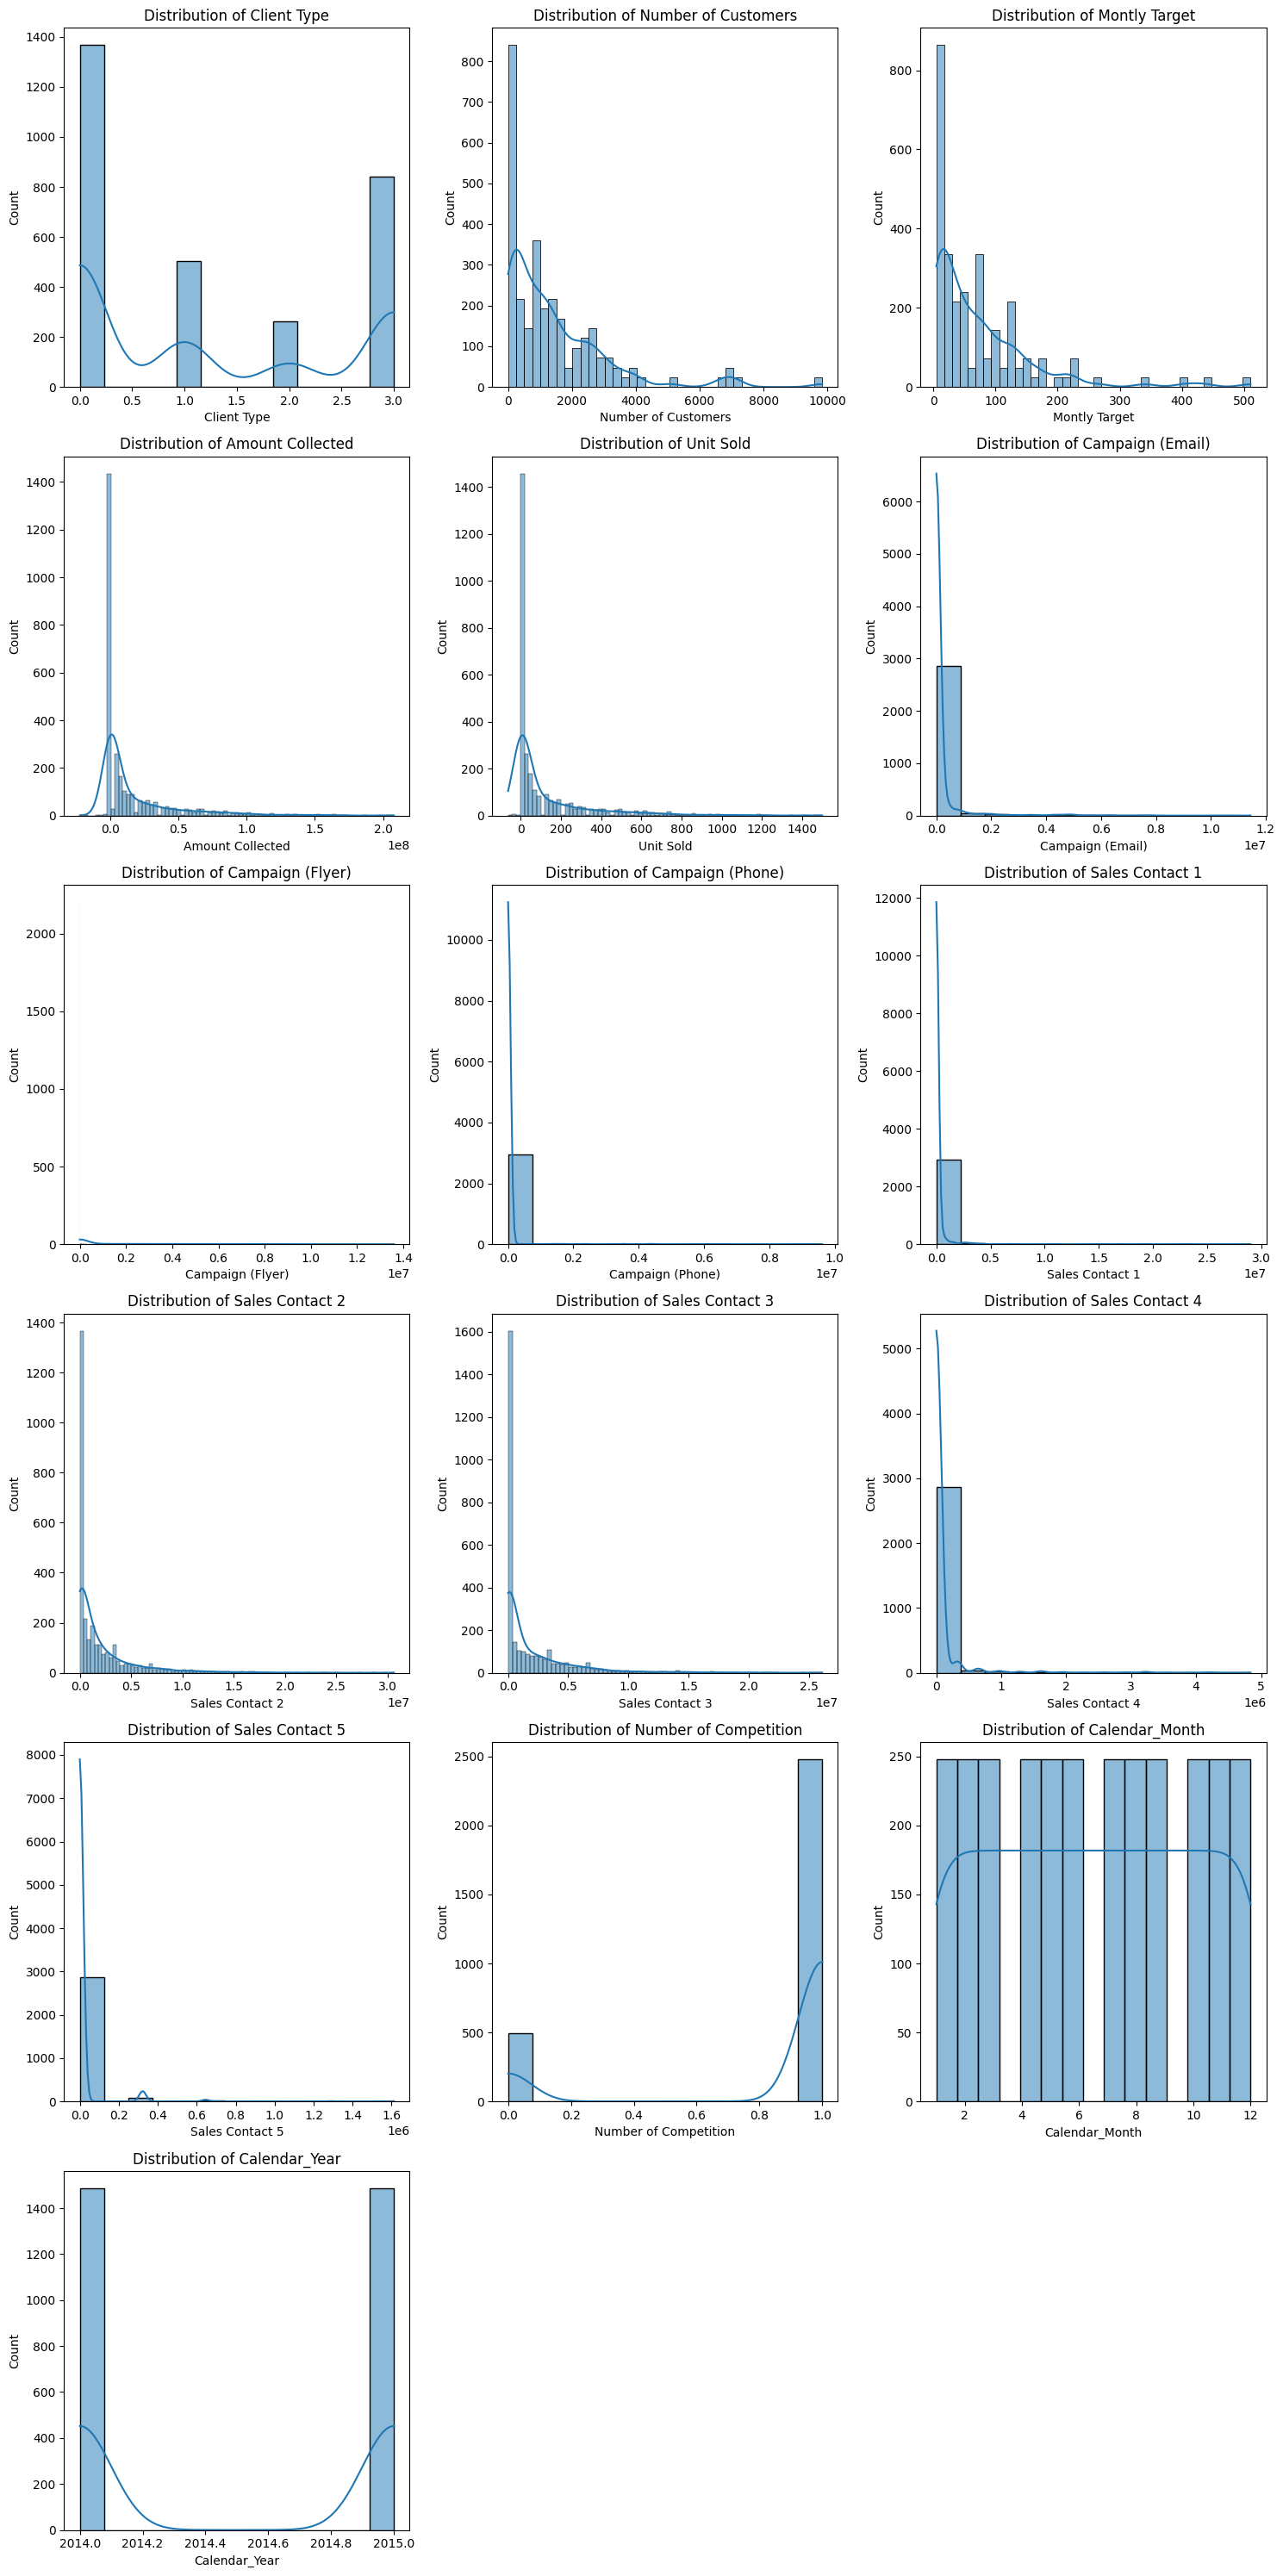

In [20]:
# Distribution of Numerical Features
numerical_features = data.select_dtypes(include=[np.number]).columns

# Calculate the number of rows and columns needed for subplots
num_features = len(numerical_features)
num_rows = (num_features - 1) // 3 + 1
num_cols = min(num_features, 3)

# Create a figure with subplots
plt.figure(figsize=(15, 5 * num_rows))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    
    # Plot histogram with KDE
    sns.histplot(data[feature], kde=True)
    
    # Add title to each subplot
    plt.title(f'Distribution of {feature}')

# Adjust layout for better visualization
plt.tight_layout()

# Display the plots
plt.show()

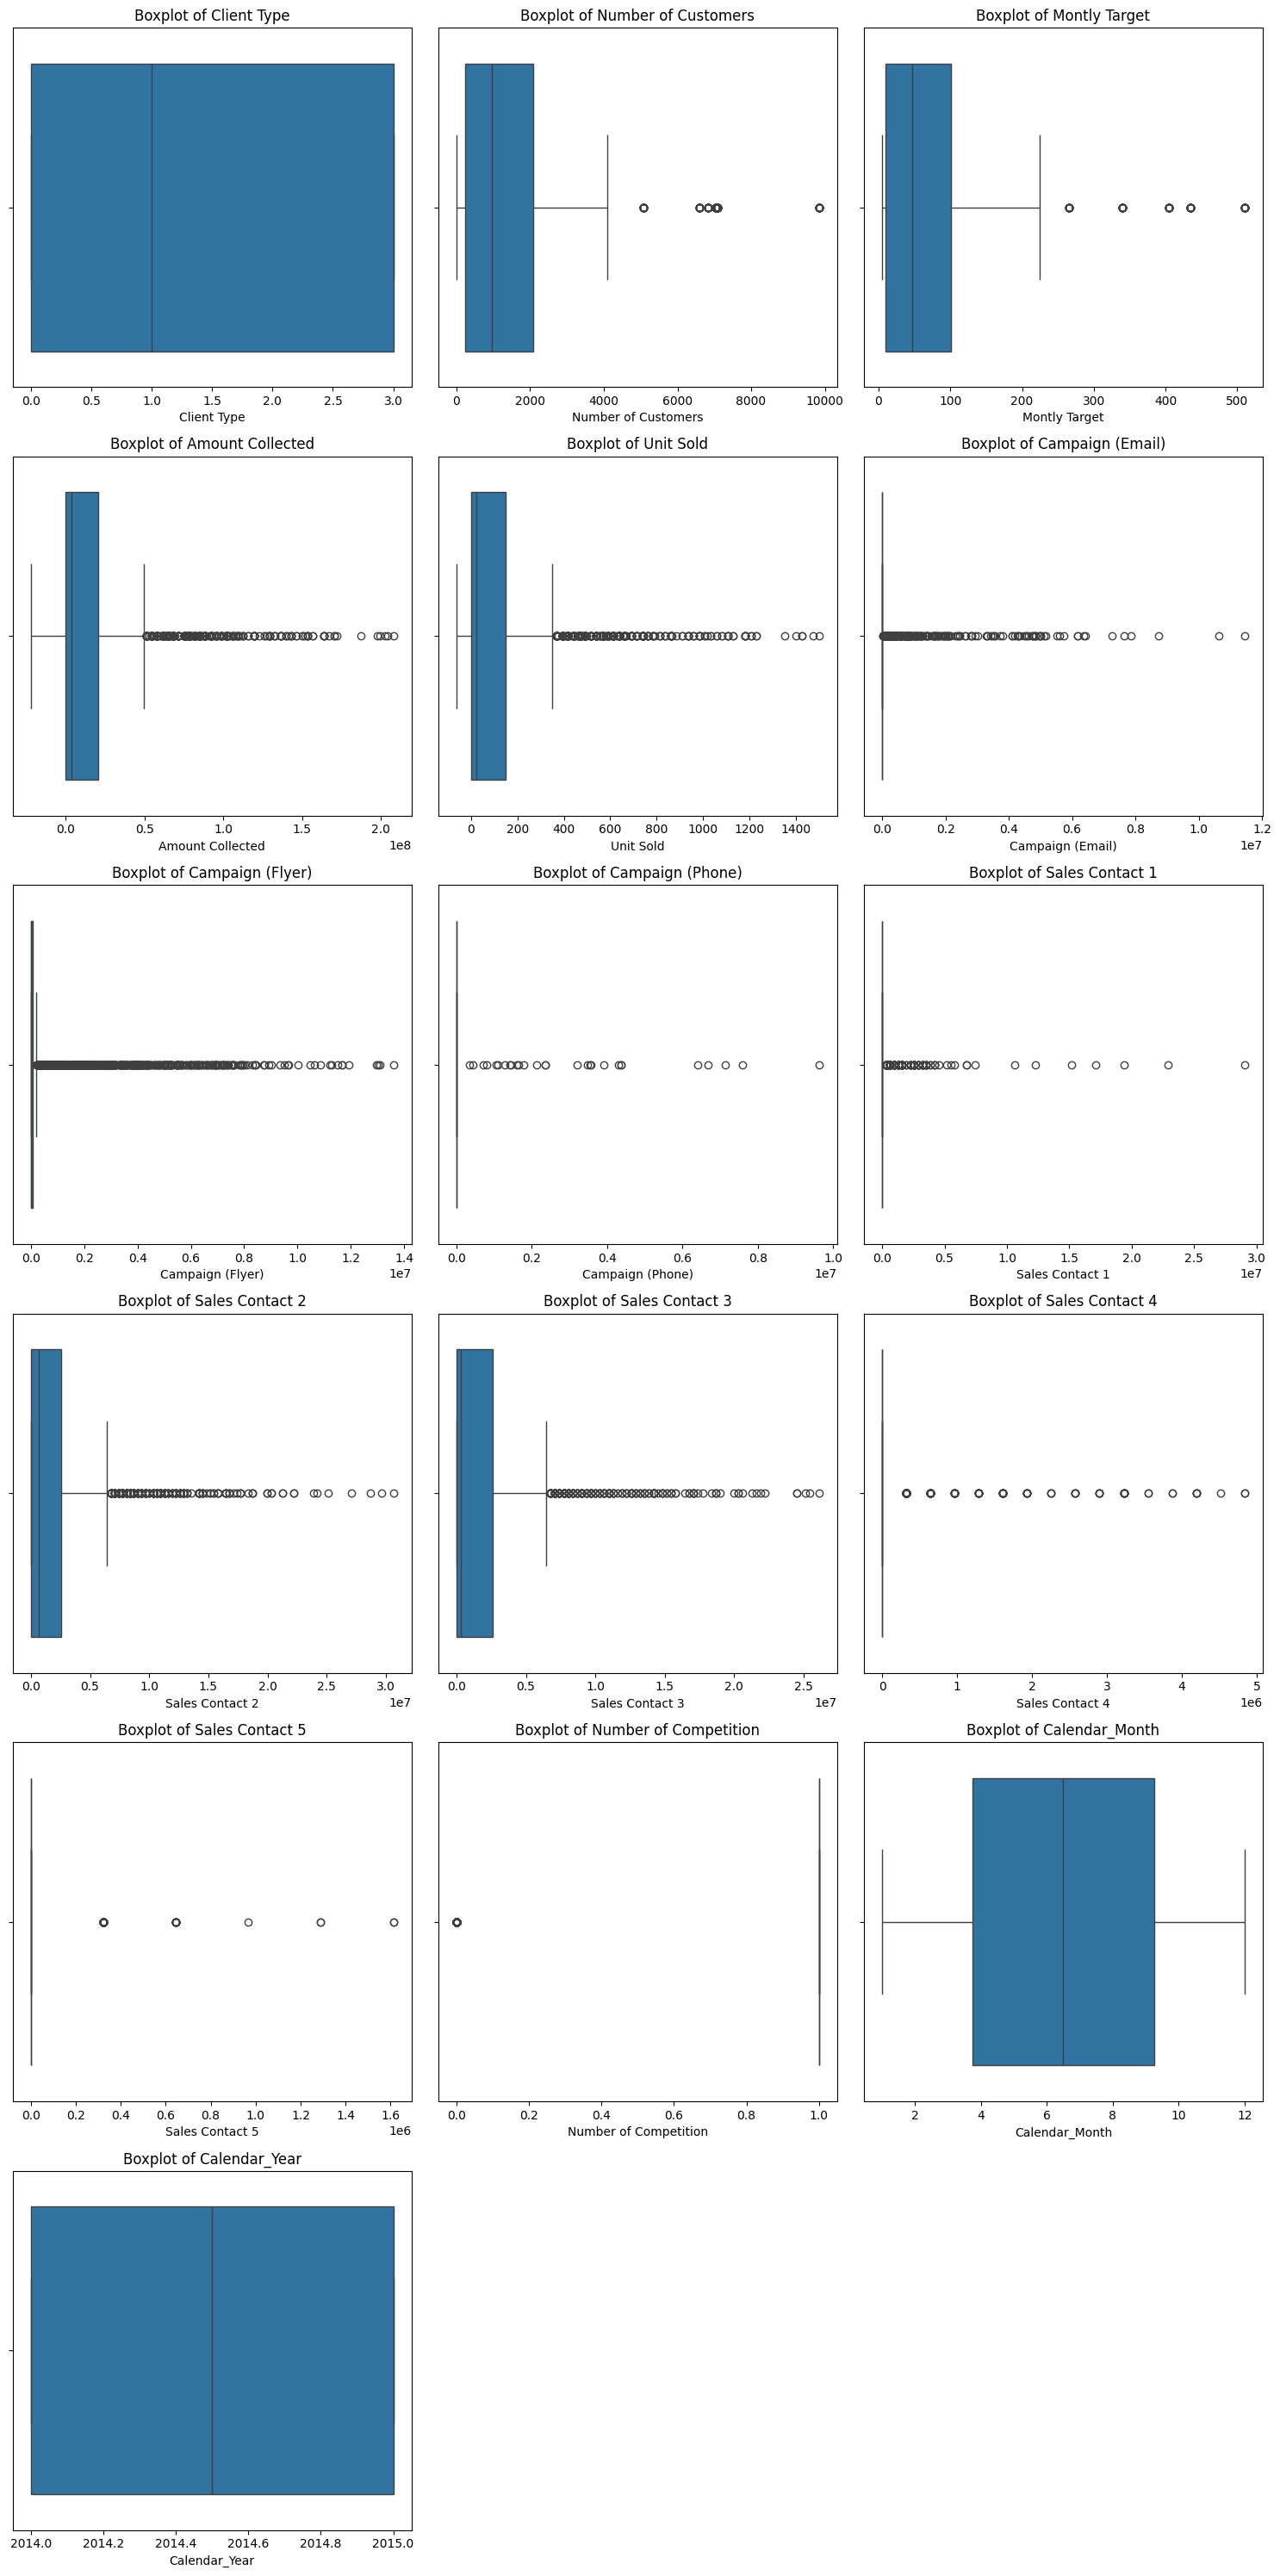

In [21]:
# Boxplots for Numerical Features
plt.figure(figsize=(15, 5 * num_rows))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    
    # Plot boxplot
    sns.boxplot(x=data[feature])
    
    # Add title to each subplot
    plt.title(f'Boxplot of {feature}')

# Adjust layout for better visualization
plt.tight_layout()

# Display the plots
plt.show()

In [22]:
print(data.columns)

Index(['Client Type', 'Number of Customers', 'Montly Target',
       'Amount Collected', 'Unit Sold', 'Campaign (Email)', 'Campaign (Flyer)',
       'Campaign (Phone)', 'Sales Contact 1', 'Sales Contact 2',
       'Sales Contact 3', 'Sales Contact 4', 'Sales Contact 5',
       'Number of Competition', 'Calendar_Month', 'Calendar_Year'],
      dtype='object')


In [23]:
# Correlation analysis for numerical columns
print("\nCorrelation with 'Amount Collected':")
if 'Amount Collected' in data.columns:
    correlation_amount_collected = data.corr()['Amount Collected'].sort_values(ascending=False)
    print(correlation_amount_collected)


Correlation with 'Amount Collected':
Amount Collected         1.000000
Unit Sold                0.997515
Montly Target            0.608204
Number of Customers      0.607496
Sales Contact 2          0.552112
Campaign (Flyer)         0.444337
Sales Contact 3          0.357887
Calendar_Year            0.286194
Sales Contact 1          0.277478
Campaign (Email)         0.248235
Sales Contact 4          0.236165
Calendar_Month           0.139425
Sales Contact 5          0.095795
Campaign (Phone)         0.034858
Number of Competition   -0.188380
Client Type             -0.286855
Name: Amount Collected, dtype: float64


Correlation Analysis

In [28]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

# Use correct column names as per your DataFrame
correlation_analysis = pd.DataFrame(
    data[['Amount Collected', 'Campaign (Email)', 'Campaign (Flyer)',
          'Campaign (Phone)', 'Sales Contact 1', 'Sales Contact 2',
          'Sales Contact 3', 'Sales Contact 4', 'Sales Contact 5']]
    .corr()['Amount Collected']).reset_index()

correlation_analysis.columns = ['Impacting Variable', 'Degree of Linear Impact (Correlation)']
correlation_analysis = correlation_analysis[correlation_analysis['Impacting Variable'] != 'Amount Collected']
correlation_analysis = correlation_analysis.sort_values('Degree of Linear Impact (Correlation)', ascending=False)

# Use the format method to set precision
correlation_analysis.style.background_gradient(cmap=cm).format({'Degree of Linear Impact (Correlation)': '{:.2f}'})


,Impacting Variable,Degree of Linear Impact (Correlation)
5,Sales Contact 2,0.55
2,Campaign (Flyer),0.44
6,Sales Contact 3,0.36
4,Sales Contact 1,0.28
1,Campaign (Email),0.25
7,Sales Contact 4,0.24
8,Sales Contact 5,0.10
3,Campaign (Phone),0.03


The correlation results between the amount collected/sales and different marketing strategies reveal the degree and direction of the linear relationship between these variables. Here's an interpretation of the correlation coefficients:

1. **Sales Contact 2 (0.55):**
   - There is a moderate positive correlation (0.55) between the variable "Sales Contact 2" and the amount collected/sales. This suggests that as the involvement or impact of Sales Contact 2 increases, there is a corresponding positive increase in the amount collected.

2. **Campaign (Flyer) (0.44):**
   - A positive correlation of 0.44 exists between the "Campaign (Flyer)" variable and the amount collected/sales. This indicates that a stronger emphasis on flyer campaigns is associated with a higher amount collected.

3. **Sales Contact 3 (0.36):**
   - There is a positive correlation of 0.36 between "Sales Contact 3" and the amount collected/sales. An increase in the influence of Sales Contact 3 is linked to a positive impact on the amount collected.

4. **Sales Contact 1 (0.28):**
   - The variable "Sales Contact 1" has a positive correlation of 0.28 with the amount collected/sales. This suggests that a higher engagement of Sales Contact 1 is associated with an increase in the amount collected.

5. **Campaign (Email) (0.25):**
   - A positive correlation of 0.25 exists between the "Campaign (Email)" variable and the amount collected/sales. This implies that a stronger focus on email campaigns is correlated with a higher amount collected.

6. **Sales Contact 4 (0.24):**
   - There is a positive correlation of 0.24 between "Sales Contact 4" and the amount collected/sales. An increase in the influence of Sales Contact 4 is associated with a positive impact on the amount collected.

7. **Sales Contact 5 (0.10):**
   - The variable "Sales Contact 5" has a positive correlation of 0.10 with the amount collected/sales. Although the correlation is weaker compared to other variables, it still suggests a positive relationship.

8. **Campaign (Phone) (0.03):**
   - The correlation between the "Campaign (Phone)" variable and the amount collected/sales is weak (0.03). This indicates a minimal linear relationship between phone campaigns and the amount collected.

In summary, these correlation coefficients provide insights into the strength and direction of the linear association between each marketing strategy variable and the amount collected/sales. Positive correlations signify a positive relationship, while the magnitude of the correlation indicates the degree of impact.

#### Market Strategy Impact on Sales (Broken by different account type)

In [30]:
cm = sns.light_palette("green", as_cmap=True)

# Correct column references and names
correlation_analysis = pd.DataFrame(
    data.groupby('Client Type')[
        ['Amount Collected', 'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
         'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
         'Sales Contact 4', 'Sales Contact 5']].corr()['Amount Collected']
).reset_index()

correlation_analysis = correlation_analysis.sort_values(['Client Type', 'Amount Collected'], ascending=False)
correlation_analysis.columns = ['Client Type', 'Variable Impact on Sales', 'Impact']

# Display the correlation table
correlation_analysis

,Client Type,Variable Impact on Sales,Impact
27,3,Amount Collected,1.000000
32,3,Sales Contact 2,0.219759
33,3,Sales Contact 3,0.068269
28,3,Campaign (Email),0.060200
29,3,Campaign (Flyer),0.040600
34,3,Sales Contact 4,0.024401
35,3,Sales Contact 5,0.000927
31,3,Sales Contact 1,-0.015594
30,3,Campaign (Phone),NaN
18,2,Amount Collected,1.000000


#### Regression Analysis (Market Sales and Strategies)

In [31]:
# Regression model for overall data
print("\nRegression Analysis for Entire Dataset:")
data.columns = [col.replace(" ", "_").replace("(", "").replace(")", "") for col in data.columns]
formula = 'Amount_Collected ~ Campaign_Email + Campaign_Flyer + Campaign_Phone + \
       Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3 + Sales_Contact_4 + Sales_Contact_5'

if 'Amount_Collected' in data.columns:
    results = smf.ols(formula, data=data).fit()
    print(results.summary())


Regression Analysis for Entire Dataset:
                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     342.1
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        08:39:36   Log-Likelihood:                -54512.
No. Observations:                2976   AIC:                         1.090e+05
Df Residuals:                    2967   BIC:                         1.091e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
I

In [32]:
# Use StringIO to wrap the HTML string
html_str = results.summary().tables[1].as_html()
df = pd.read_html(StringIO(html_str), header=0, index_col=0)[0]

In [33]:
df=df.reset_index()
df=df[df['P>|t|']<0.05][['index','coef','P>|t|']]
df

,index,coef,P>|t|
0,Intercept,1.481000e+06,0.004
2,Campaign_Flyer,3.337600e+00,0.000
4,Sales_Contact_1,4.236800e+00,0.000
5,Sales_Contact_2,3.638200e+00,0.000
6,Sales_Contact_3,2.343200e+00,0.000
7,Sales_Contact_4,1.094780e+01,0.000


#### Regression Analysis (Market Sales and Strategies) - Broken for different client types

In [34]:
# Initialize an empty DataFrame for consolidated summary
consolidated_summary = pd.DataFrame()

for acctype in set(data['Client_Type']):
    temp_data = data[data['Client_Type'] == acctype].copy()

    # Fit the regression model
    results = smf.ols('Amount_Collected ~ Campaign_Email + Campaign_Flyer + Campaign_Phone + \
           Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3 + Sales_Contact_4 + Sales_Contact_5', data=temp_data).fit()

    # Extract relevant information from the summary
    summary_df = pd.read_html(results.summary().tables[1].as_html(), header=0, index_col=0)[0].reset_index()
    summary_df = summary_df[summary_df['P>|t|'] < 0.05][['index', 'coef']]
    summary_df.columns = ['Variable', 'Coefficient (Impact)']
    summary_df['Account Type'] = acctype
    summary_df = summary_df.sort_values('Coefficient (Impact)', ascending=False)
    summary_df = summary_df[summary_df['Variable'] != 'Intercept']

    print(acctype)
    print(summary_df)

    # Concatenate DataFrames to create a consolidated summary
    consolidated_summary = pd.concat([consolidated_summary, summary_df])

# Display consolidated summary
print("Consolidated Summary:")
print(consolidated_summary)


0
          Variable  Coefficient (Impact)  Account Type
4  Sales_Contact_1               11.6731             0
7  Sales_Contact_4               10.6145             0
5  Sales_Contact_2                4.0031             0
2   Campaign_Flyer                2.7204             0
6  Sales_Contact_3                2.0316             0
3   Campaign_Phone               -3.5361             0
1
          Variable  Coefficient (Impact)  Account Type
2   Campaign_Flyer                4.1059             1
5  Sales_Contact_2                3.5778             1
4  Sales_Contact_1                3.1365             1
6  Sales_Contact_3                2.1174             1
2
          Variable  Coefficient (Impact)  Account Type
5  Sales_Contact_2                6.6223             2
3
          Variable  Coefficient (Impact)  Account Type
5  Sales_Contact_2              0.810100             3
3   Campaign_Phone             -0.000003             3
Consolidated Summary:
          Variable  Coefficient (Im

C:\Users\ashis\AppData\Local\Temp\ipykernel_24420\1339692947.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  summary_df = pd.read_html(results.summary().tables[1].as_html(), header=0, index_col=0)[0].reset_index()
C:\Users\ashis\AppData\Local\Temp\ipykernel_24420\1339692947.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  summary_df = pd.read_html(results.summary().tables[1].as_html(), header=0, index_col=0)[0].reset_index()
C:\Users\ashis\AppData\Local\Temp\ipykernel_24420\1339692947.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  summary_df = pd.read_html(results.summary().tables[1].as_html(), header=0

In [36]:
# Initialize an empty DataFrame for consolidated summary
consolidated_summary = pd.DataFrame()

for acctype in set(data['Client_Type']):
    print(acctype)
    temp_data = data[data['Client_Type'] == acctype].copy()

    # Fit the regression model
    results = smf.ols('Amount_Collected ~ Campaign_Email + Campaign_Flyer + Campaign_Phone + \
           Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3 + Sales_Contact_4 + Sales_Contact_5', data=temp_data).fit()

    # Extract relevant information from the summary
    df = pd.read_html(results.summary().tables[1].as_html(), header=0, index_col=0)[0].reset_index()
    df = df[df['P>|t|'] < 0.05][['index', 'coef']]
    df.columns = ['Variable', 'Coefficient (Impact)']
    df['Account Type'] = acctype
    df = df.sort_values('Coefficient (Impact)', ascending=False)
    df = df[df['Variable'] != 'Intercept']

    consolidated_summary = pd.concat([consolidated_summary, df])

    print(results.summary())

# Display consolidated summary
print("Consolidated Summary:")
print(consolidated_summary)


0
                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     100.2
Date:                Fri, 07 Feb 2025   Prob (F-statistic):          4.64e-131
Time:                        08:39:56   Log-Likelihood:                -25075.
No. Observations:                1368   AIC:                         5.017e+04
Df Residuals:                    1359   BIC:                         5.021e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.812e+06   9.29e+05   

C:\Users\ashis\AppData\Local\Temp\ipykernel_24420\4102915997.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(results.summary().tables[1].as_html(), header=0, index_col=0)[0].reset_index()
C:\Users\ashis\AppData\Local\Temp\ipykernel_24420\4102915997.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(results.summary().tables[1].as_html(), header=0, index_col=0)[0].reset_index()
C:\Users\ashis\AppData\Local\Temp\ipykernel_24420\4102915997.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(results.summary().tables[1].as_html(), header=0, index_col=0)[0].reset_

## 5. Final Recommendations

Using the below table we can use the coefficent to see how much return we can derive from each dollar we spend, here we can clearly see that for different account type different Campaigns and Different Sales Contact are effective with different extend. 

<b>Case Explanation - Medium Facility </b><br>
For Example Medium Facility shows decent results with Flyer Campiagns and each dollar spend return 4 dollars on average. Sales Contact 2 is highly effective followed by Sales Contact 1 and Sales Contact 3. Else all other strategy shows no impact can be dropped to save cost. 


In [37]:
consolidated_summary

,Variable,Coefficient (Impact),Account Type
4,Sales_Contact_1,11.673100,0
7,Sales_Contact_4,10.614500,0
5,Sales_Contact_2,4.003100,0
2,Campaign_Flyer,2.720400,0
6,Sales_Contact_3,2.031600,0
3,Campaign_Phone,-3.536100,0
2,Campaign_Flyer,4.105900,1
5,Sales_Contact_2,3.577800,1
4,Sales_Contact_1,3.136500,1
6,Sales_Contact_3,2.117400,1


# Return on Investment (ROI)

Return on Investment (ROI) is a measure of the profitability of an investment. In the context of this analysis, the "Return on Investment" column represents the regression coefficient for each significant variable in a regression model. 

In [38]:
consolidated_summary.reset_index(inplace=True)
consolidated_summary.drop('index',inplace=True,axis=1)

In [39]:
consolidated_summary.columns = ['Variable','Return on Investment','Account Type']
consolidated_summary['Return on Investment']= consolidated_summary['Return on Investment'].apply(lambda x: round(x,1))
consolidated_summary.style.background_gradient(cmap='RdYlGn')

,Variable,Return on Investment,Account Type
0,Sales_Contact_1,11.700000,0
1,Sales_Contact_4,10.600000,0
2,Sales_Contact_2,4.000000,0
3,Campaign_Flyer,2.700000,0
4,Sales_Contact_3,2.000000,0
5,Campaign_Phone,-3.500000,0
6,Campaign_Flyer,4.100000,1
7,Sales_Contact_2,3.600000,1
8,Sales_Contact_1,3.100000,1
9,Sales_Contact_3,2.100000,1


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [41]:
def format(x):
        return "${:.1f}".format(x)
consolidated_summary['Return on Investment']  = consolidated_summary['Return on Investment'].apply(format)

In [43]:
consolidated_summary.columns = ['Variable','Return on Investment','Account Type']
# Map account type numbers to facility names
account_type_mapping = {
    0: 'Large Facility',
    1: 'Medium Facility',
    2: 'Private Facility',
    3: 'Small Facility'
}
consolidated_summary['Account Type'] = consolidated_summary['Account Type'].replace(account_type_mapping)

# Apply gradient styling
consolidated_summary.style.background_gradient(cmap='RdYlGn')

,Variable,Return on Investment,Account Type
0,Sales_Contact_1,$11.7,Large Facility
1,Sales_Contact_4,$10.6,Large Facility
2,Sales_Contact_2,$4.0,Large Facility
3,Campaign_Flyer,$2.7,Large Facility
4,Sales_Contact_3,$2.0,Large Facility
5,Campaign_Phone,$-3.5,Large Facility
6,Campaign_Flyer,$4.1,Medium Facility
7,Sales_Contact_2,$3.6,Medium Facility
8,Sales_Contact_1,$3.1,Medium Facility
9,Sales_Contact_3,$2.1,Medium Facility


The regression coefficients for different variables within distinct facility types provide insights into the estimated impact on Return on Investment (ROI) for a one-unit change in each independent variable, while keeping other variables constant. Here's a breakdown of the coefficients:

**Sales_Contact_1 in Large Facility:**
For a unit increase in Sales_Contact_1 within Large Facility, the Return on Investment is $11.7.

**Sales_Contact_4 in Large Facility:**
A unit increase in Sales_Contact_4 within Large Facility corresponds to a Return on Investment of $10.6.

**Sales_Contact_2 in Large Facility:**
In Large Facility, a unit increase in Sales_Contact_2 results in a negligible Return on Investment of $4.0.

**Campaign_Flyer in Large Facility:**
For Large Facility, a unit increase in Campaign_Flyer is associated with a Return on Investment of $2.7.

**Sales_Contact_3 in Large Facility:**
In Large Facility, a unit increase in Sales_Contact_3 yields a Return on Investment of $2.0.

**Campaign_Phone in Large Facility:**
A unit increase in Campaign_Phone within Large Facility corresponds to a Return on Investment of -$3.5.

**Campaign_Flyer in Medium Facility:**
In Medium Facility, a unit increase in Campaign_Flyer results in a Return on Investment of $4.1.

**Sales_Contact_2 in Medium Facility:**
For Medium Facility, a unit increase in Sales_Contact_2 is associated with a substantial Return on Investment of $3.6.

**Sales_Contact_1 in Medium Facility:**
In Medium Facility, a unit increase in Sales_Contact_1 yields a significant Return on Investment of $3.1.

**Sales_Contact_3 in Medium Facility:**
For Medium Facility, a unit increase in Sales_Contact_3 corresponds to a Return on Investment of $2.1.

**Sales_Contact_2 in Private Facility:**
In Private Facility, a unit increase in Sales_Contact_2 results in a Return on Investment of $6.6.

**Sales_Contact_2 in Small Facility:**
For Small Facility, a unit increase in Sales_Contact_2 yields a Return on Investment of $0.8.

**Campaign_Phone in Small Facility:**
In Small Facility, a unit increase in Campaign_Phone is associated with a negative Return on Investment of $0.0.

These coefficients help interpret the direction and magnitude of the impact each variable has on ROI, providing valuable information for decision-making and understanding the factors influencing investment returns. Positive coefficients indicate a positive impact, while negative coefficients suggest a negative impact. The larger the coefficient, the stronger the influence on ROI.

In [44]:
from IPython.display import FileLink

# Save the CSV file
consolidated_summary.to_csv('consolidated_summary.csv')

# Create a link to download the file
FileLink('consolidated_summary.csv')


C:\Users\ashis\OneDrive\Desktop\Projects\Marketing Analysis\consolidated_summary.csv